In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import my_functions as mf

In [3]:
df = pd.read_csv('data/train.csv', parse_dates=True)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Cleaning

First, I'd like to check and clean up a few things.

## Target Variable Outliers

It looks like there are a lot of outliers for sale prices. I could try removing the sale price

Average Sale Price: $1.8e+05
Median Sale Price: $1.6e+05


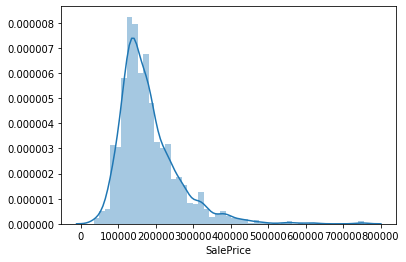

In [34]:
sns.distplot(df.SalePrice)
print('Average Sale Price: ${:,.2}'.format(df.SalePrice.mean()))
print('Median Sale Price: ${:,.2}'.format(df.SalePrice.median()))

# Conventional Wisdom

After reading Freakonomics, the number one place I always like to start my analysis is in conventional wisdom. Can we question pre-existing conventional wisdom to gain better insight? If I ask any random person, what may they think is a great factor in buying a house?

I asked a few people what factors they thought would affect housing prices. Here are a few conventional wisdoms about house prices that I want to start with based on their answers:

- Location, location, location -- housing prices are heavily influenced by neighborhoods
    - Are houses sold near good schools sold at higher prices?
    - Safety of the neighborhood - high crime rates equate to lower prices?
- House history
    - Houses w/ clean records sell at higher prices?
    - Renovated houses sell at higher prices?
- Prices during times of big news
    - Were there any points in time when the average price went down? How about went up?
- House details
    - Larger houses sell at higher prices?
    - Houses w/ a lawn or backyard sell at higher prices?

## Location, Location, Location

- Are houses sold near good schools sold at higher prices?
- Safety of the neighborhood - high crime rates equate to lower prices?

### QUESTION: Are houses sold near good schools sold at higher prices?

We'll first need to figure out which schools are in which neighborhoods. Unfortunately, because Ames, Iowa is so small, there's only one high school in the entire city. It's also unlikely that the neighborhoods are as diverse as they would be in metropolitan areas, but it's still good to look into.

It looks like the graph is skewed right. I'm going to remove all points

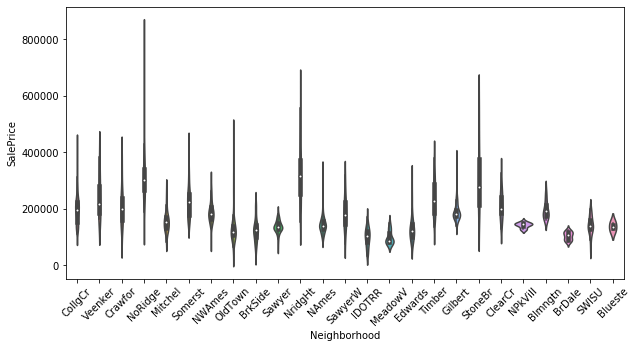

In [22]:
plt.figure(figsize=(10, 5))
sns.violinplot(
    x='Neighborhood',
    y='SalePrice',
    data=df
)
locs, labels = plt.xticks()
# labels = [x.get_text() for x in labels]
plt.setp(labels, rotation=45);

In [23]:
# Top 5 neighborhoods
df.groupby('Neighborhood').SalePrice.mean().sort_values(ascending=False).head(5)

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64

In [24]:
# Bottom 5 neighborhoods
df.groupby('Neighborhood').SalePrice.mean().sort_values(ascending=True).head(5)

Neighborhood
MeadowV     98576.470588
IDOTRR     100123.783784
BrDale     104493.750000
BrkSide    124834.051724
Edwards    128219.700000
Name: SalePrice, dtype: float64